In [1]:
# 1. Install the Ultralytics library (which includes YOLOv8)
!pip install ultralytics

# 2. Check to make sure the GPU is connected
# You should see a table show up below this, with "T4" listed as the name.
# If it says "NVIDIA-SMI has failed...", your runtime is not set up correctly.
!nvidia-smi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 28.4 MB/s eta 0:00:00
Sun Oct 19 05:29:24 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   56C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                    

In [ ]:
# 1. Install the Roboflow library to download the data
!pip install roboflow

# 2. Import the library and download the dataset
from roboflow import Roboflow

# !!! PASTE YOUR KEY FROM THE ROBOFLOW WEBSITE HERE !!!
rf = Roboflow(api_key="PRIVATE_KEY")
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

# This downloads the dataset in the correct YOLOv8 format
project = rf.workspace("east-west-university-9frzq").project("kidney-stone-detection-wfjba")
dataset = project.version(1).download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 47.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 57.6 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Kidney-stone-detection-1 in yolov8:: 100%|██████████| 6822/6822 [00:03<00:00, 1809.67it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
# 3. Start training the model!
# We are using 'yolov8n.pt' (the fastest 'nano' model)
# We point 'data' to the 'data.yaml' file inside the folder from the last step
# We train for 20 epochs, which is fast and good enough for this task

!yolo task=detect mode=train \
model=yolov8n.pt \
data='Kidney-stone-detection-1/data.yaml' \
epochs=20 \
imgsz=640 \
batch=16

Ultralytics 8.3.217 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=Kidney-stone-detection-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, 

In [ ]:
from ultralytics import YOLO
import os

# --- 1. DEFINE YOUR CORE RESEARCH ASSUMPTION ---
# This is the "pixel spacing" in mm. We'll assume 0.5mm per pixel.
PIXEL_SPACING_MM = 0.5

# 2. Load your best trained model from the previous step
model = YOLO('/content/runs/detect/train/weights/best.pt')

# 3. Get a list of images from your test set to run inference on
test_image_dir = 'Kidney-stone-detection-1/test/images/'

# Let's just grab the first 10 images to test (you can remove '[:10]' to do all of them)
image_files = [os.path.join(test_image_dir, f) for f in os.listdir(test_image_dir)][:10]

# 4. Run prediction and calculate the size in millimeters
print("--- STARTING AUTOMATED MEASUREMENT ---")
results = model.predict(image_files)

# This loop will go through each image's results
for result in results:
    # Get the original image filename
    img_path = result.path
    print(f"\nResults for image: {os.path.basename(img_path)}")

    # Get the bounding boxes (if any)
    boxes = result.boxes

    if len(boxes) == 0:
        print("  No stones detected.")
        continue

    # Get the 'xywh' format (x, y, width, height)
    # We only care about the width (box[2]) and height (box[3])
    for box_xywh in boxes.xywh:
        pixel_width = box_xywh[2].item()  # .item() gets the number from the tensor
        pixel_height = box_xywh[3].item()

        # --- THIS IS YOUR CORE CALCULATION ---
        mm_width = pixel_width * PIXEL_SPACING_MM
        mm_height = pixel_height * PIXEL_SPACING_MM

        print(f"  Stone detected!")
        print(f"  Pixel dimensions: {pixel_width:.0f} (w) x {pixel_height:.0f} (h)")
        print(f"  ==> Automated Size: {mm_width:.2f} mm x {mm_height:.2f} mm")

print("\n--- MEASUREMENT COMPLETE ---")

--- STARTING AUTOMATED MEASUREMENT ---

0: 640x640 1 Tas_Var, 5.6ms
1: 640x640 3 Tas_Vars, 5.6ms
2: 640x640 2 Tas_Vars, 5.6ms
3: 640x640 4 Tas_Vars, 5.6ms
4: 640x640 2 Tas_Vars, 5.6ms
5: 640x640 1 Tas_Var, 5.6ms
6: 640x640 1 Tas_Var, 5.6ms
7: 640x640 3 Tas_Vars, 5.6ms
8: 640x640 1 Tas_Var, 5.6ms
9: 640x640 1 Tas_Var, 5.6ms
Speed: 4.1ms preprocess, 5.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

Results for image: 1-3-46-670589-33-1-63736458322797005700001-5208768444025627150_png_jpg.rf.25f26d6d9f0fd3d4eeaa45897c99d640.jpg
  Stone detected!
  Pixel dimensions: 15 (w) x 14 (h)
  ==> Automated Size: 7.32 mm x 7.18 mm

Results for image: 1-3-46-670589-33-1-63741294924341752200001-5737252104776306241_png_jpg.rf.894f617da63bf2431c77d11089fde240.jpg
  Stone detected!
  Pixel dimensions: 12 (w) x 11 (h)
  ==> Automated Size: 5.91 mm x 5.43 mm
  Stone detected!
  Pixel dimensions: 17 (w) x 17 (h)
  ==> Automated Size: 8.48 mm x 8.41 mm
  Stone detected!
  Pixel dimension

Displaying 10 images with automated measurements...


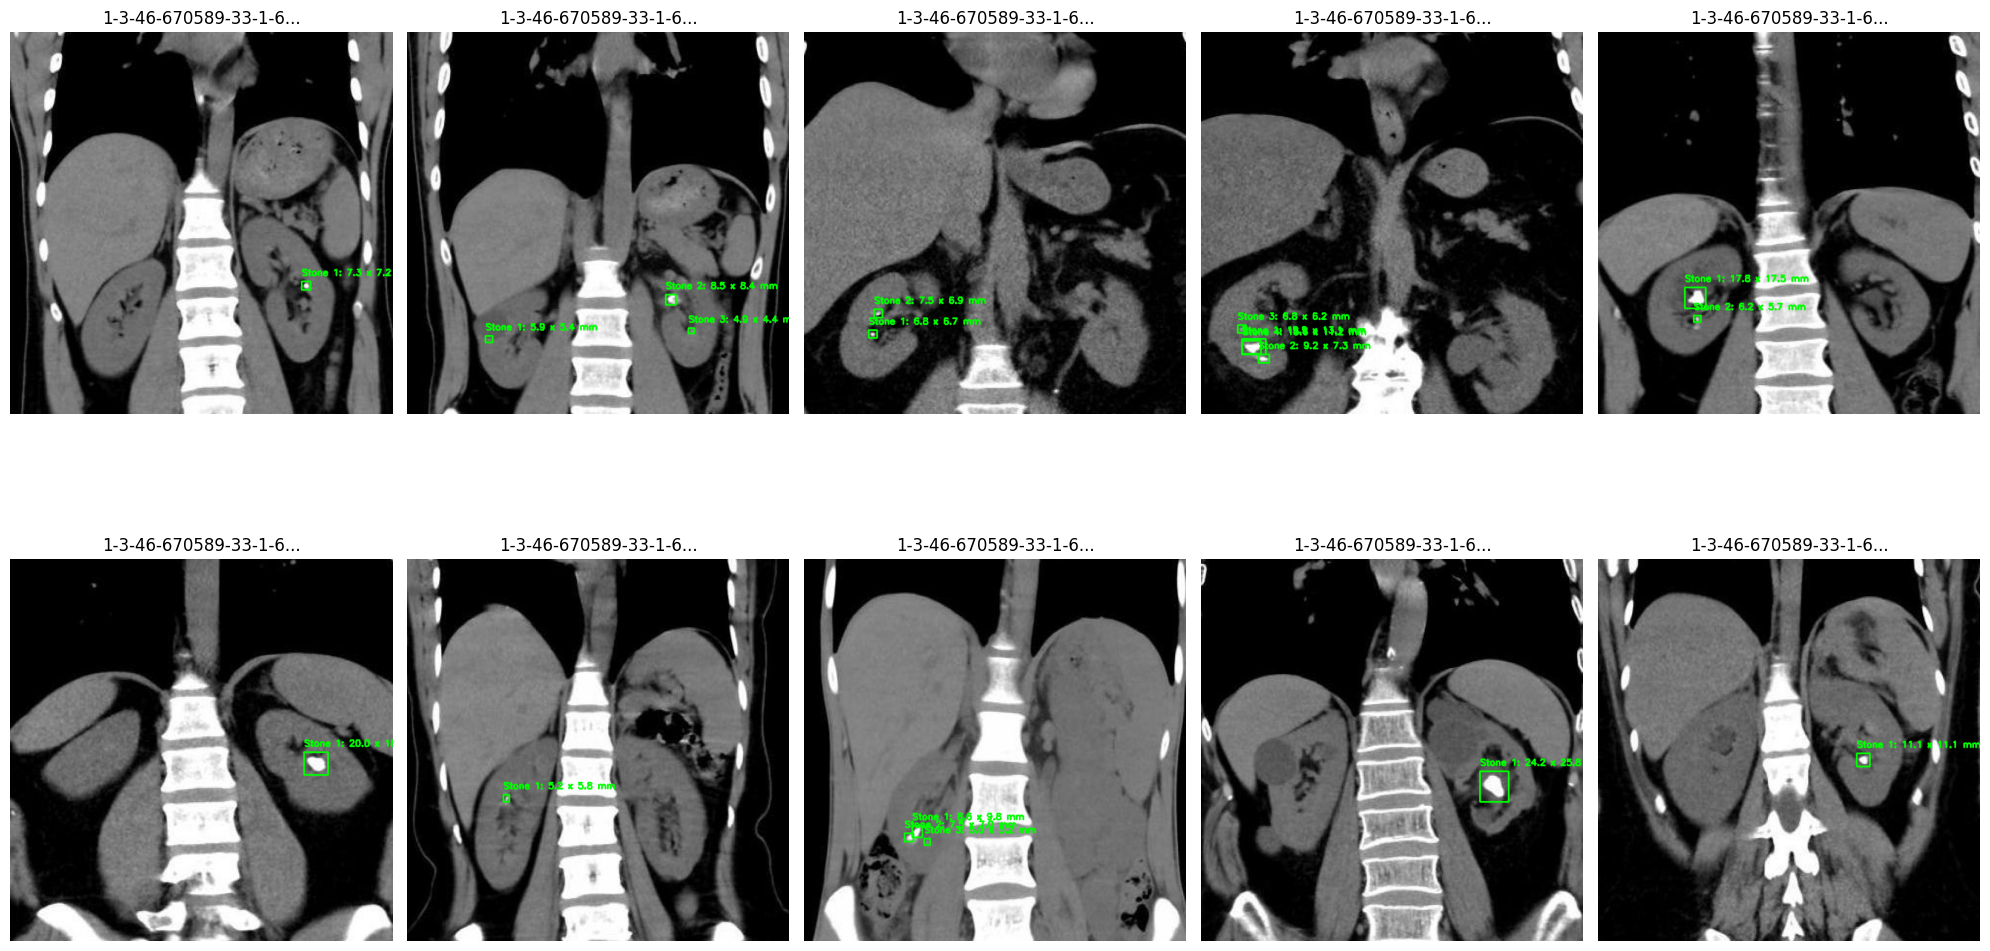

In [7]:
import matplotlib.pyplot as plt
import cv2 # We use this to draw boxes and text
import numpy as np
import os

# --- We use the same assumption from Cell 4 ---
PIXEL_SPACING_MM = 0.5

# --- We use the same model and image list from Cell 4 ---
# (This re-runs the prediction, but is cleaner for a single cell)
# model = YOLO('/content/runs/detect/train/weights/best.pt')
# test_image_dir = 'Kidney-stone-detection-1/test/images/'
# image_files = [os.path.join(test_image_dir, f) for f in os.listdir(test_image_dir)][:10]

# --- 1. Get the results again (this is very fast) ---
# We already have the 'results' variable in memory from Cell 4. Let's use it.
print(f"Displaying {len(results)} images with automated measurements...")


# --- 2. Set up a grid to show 10 images (2 rows, 5 columns) ---
fig, axes = plt.subplots(2, 5, figsize=(20, 12)) # Made it a bit taller
axes = axes.flatten() # Make the 2x5 grid a simple list to loop over


# --- 3. Loop through each result object ---
for i, result in enumerate(results):

    # Get the original image (as a NumPy array)
    # We make a copy to draw on it
    img = result.orig_img.copy()

    # Counter for stones in *this* image
    stone_counter = 1

    # Loop through all boxes found in this one image
    for box in result.boxes:

        # --- a. Get Coordinates and Dimensions ---
        # Get the pixel coordinates [x1, y1, x2, y2]
        box_coords = box.xyxy[0].cpu().numpy().astype(int)
        # Get pixel width and height from the [x, y, w, h] format
        pixel_width = box.xywh[0][2].item()
        pixel_height = box.xywh[0][3].item()

        # --- b. Calculate Millimeters ---
        mm_width = pixel_width * PIXEL_SPACING_MM
        mm_height = pixel_height * PIXEL_SPACING_MM

        # --- c. Create Your Custom Label ---
        label = f"Stone {stone_counter}: {mm_width:.1f} x {mm_height:.1f} mm"

        # --- d. Draw on the Image ---
        # Draw the bounding box (green color, thickness 2)
        cv2.rectangle(img, (box_coords[0], box_coords[1]), (box_coords[2], box_coords[3]), (0, 255, 0), 2)

        # Draw the text label just above the box
        cv2.putText(img, label, (box_coords[0], box_coords[1] - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2) # Green text

        stone_counter += 1 # Increment for the next stone

    # --- 4. Display the modified image in the grid ---
    # cv2 uses BGR color, matplotlib uses RGB, so we convert it
    axes[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

    # Shorten the long filename to make it readable
    short_title = os.path.basename(result.path)[:20] + "..."
    axes[i].set_title(short_title)
    axes[i].axis('off') # Hide the x/y axis numbers

plt.tight_layout()
plt.show()